In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/home/brandon/ML Zoomcamp/Capstone Project 1/salaries.csv')

In [3]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,AI Engineer,20000,EUR,21593,PT,50,PT,L
1,2023,SE,FT,Data Scientist,201650,USD,201650,US,0,US,M
2,2023,SE,FT,Data Scientist,124600,USD,124600,US,0,US,M
3,2023,SE,FT,Business Intelligence Analyst,198200,USD,198200,US,0,US,M
4,2023,SE,FT,Business Intelligence Analyst,110200,USD,110200,US,0,US,M


In [4]:
list(data.columns)

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467 entries, 0 to 8466
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8467 non-null   int64 
 1   experience_level    8467 non-null   object
 2   employment_type     8467 non-null   object
 3   job_title           8467 non-null   object
 4   salary              8467 non-null   int64 
 5   salary_currency     8467 non-null   object
 6   salary_in_usd       8467 non-null   int64 
 7   employee_residence  8467 non-null   object
 8   remote_ratio        8467 non-null   int64 
 9   company_location    8467 non-null   object
 10  company_size        8467 non-null   object
dtypes: int64(4), object(7)
memory usage: 727.8+ KB


In [6]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,8467.000000,8.467000e+03,8467.000000,8467.000000
mean,2022.727058,1.756464e+05,149379.921814,39.222865
std,0.550565,4.648831e+05,64138.469505,48.163885
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.057000e+05,105000.000000,0.000000
50%,2023.000000,1.445000e+05,142200.000000,0.000000
75%,2023.000000,1.900000e+05,185900.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [7]:
data.shape

(8467, 11)

In [8]:
#Clean the headings
data.columns = data.columns.str.lower().str.replace(' ', '_') 

In [9]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,AI Engineer,20000,EUR,21593,PT,50,PT,L
1,2023,SE,FT,Data Scientist,201650,USD,201650,US,0,US,M
2,2023,SE,FT,Data Scientist,124600,USD,124600,US,0,US,M
3,2023,SE,FT,Business Intelligence Analyst,198200,USD,198200,US,0,US,M
4,2023,SE,FT,Business Intelligence Analyst,110200,USD,110200,US,0,US,M


<AxesSubplot: >

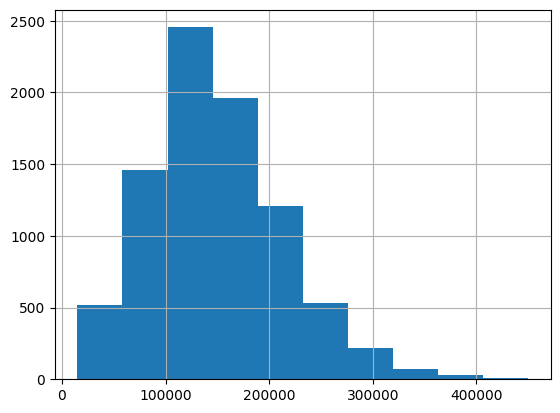

In [10]:
#Create a histogrom of salary_in_usd

data.salary_in_usd.hist()

<AxesSubplot: >

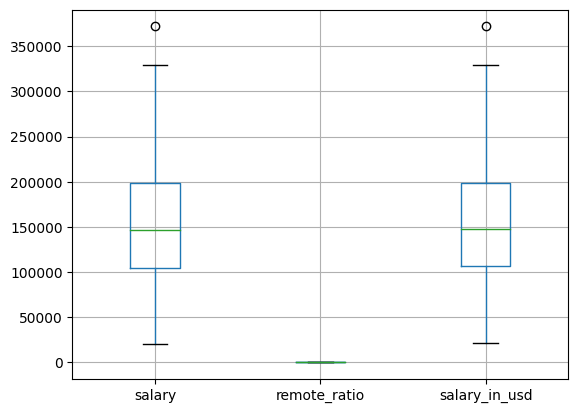

In [11]:
#Create a boxplot of salary, remote_ratio, and salary_in_usd for the first 100 rows)


data[['salary', 'remote_ratio', 'salary_in_usd']][:100].boxplot()

<AxesSubplot: xlabel='job_title'>

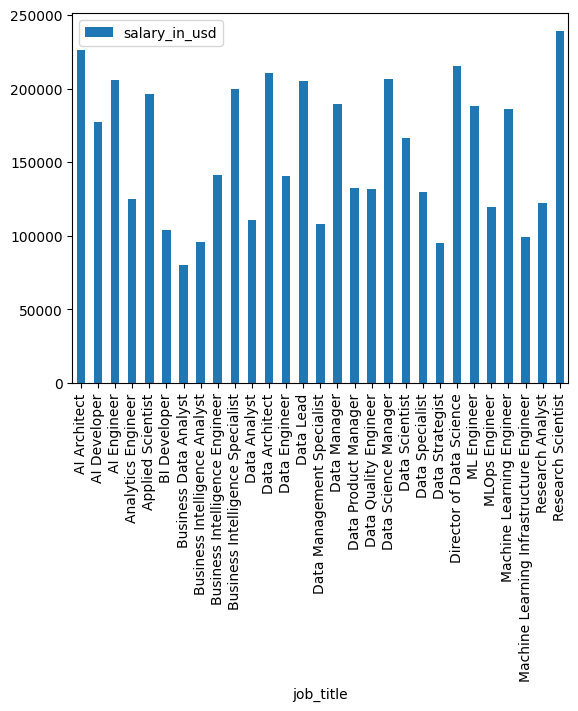

In [12]:
#Create Barchart of average salary by job title by unique job title for the first 100 rows

data[['job_title', 'salary_in_usd']][:250].groupby('job_title').mean().plot(kind='bar')

/tmp/ipykernel_124780/3706195146.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

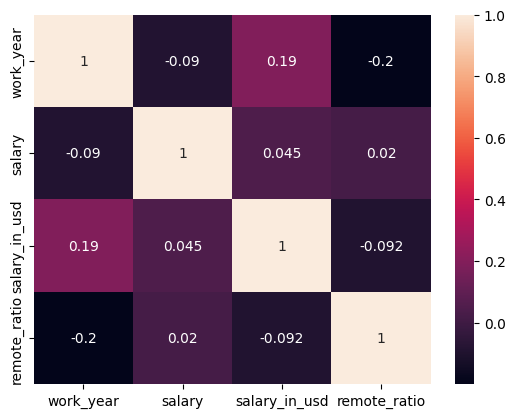

In [13]:
#Create heatmap of correlation matrix

sns.heatmap(data.corr(), annot=True)

In [14]:
#Most important features for salary_in_usd

data.corr()['salary_in_usd'].sort_values(ascending=False)

/tmp/ipykernel_124780/3410995297.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['salary_in_usd'].sort_values(ascending=False)


salary_in_usd    1.000000
work_year        0.189681
salary           0.045326
remote_ratio    -0.092025
Name: salary_in_usd, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)

In [17]:
len(df_full_train), len(df_test)

(6773, 1694)

In [18]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [19]:
len(df_train), len(df_val), len(df_test)

(5079, 1694, 1694)

In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
y_train = df_train.salary_in_usd.values
y_val = df_val.salary_in_usd.values
y_test = df_test.salary_in_usd.values

In [22]:
del df_train['salary_in_usd']
del df_val['salary_in_usd']
del df_test['salary_in_usd']

In [23]:
df_full_train = df_full_train.reset_index(drop=True)

In [24]:
df_full_train

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EX,FT,Lead Data Engineer,150000,CAD,115222,CA,100,CA,S
1,2023,MI,FT,Research Scientist,130000,USD,130000,US,0,US,M
2,2023,SE,FT,Data Engineer,116500,USD,116500,US,100,US,M
3,2023,SE,FT,Machine Learning Engineer,138000,USD,138000,US,0,US,M
4,2023,MI,FT,AI Scientist,120000,USD,120000,DE,100,DE,M
...,...,...,...,...,...,...,...,...,...,...,...
6768,2023,SE,FT,Data Engineer,136000,USD,136000,US,100,US,M
6769,2022,SE,FT,Data Engineer,63000,USD,63000,US,0,US,M
6770,2023,SE,FT,Data Science Manager,234900,USD,234900,US,0,US,M
6771,2023,SE,FT,Machine Learning Engineer,125000,USD,125000,US,0,US,M


In [25]:
df_full_train.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [26]:
df_full_train.salary.value_counts(normalize=True)

130000     0.022294
150000     0.020966
100000     0.019489
160000     0.018751
120000     0.018456
             ...   
207345     0.000148
66200      0.000148
1650000    0.000148
152380     0.000148
131712     0.000148
Name: salary, Length: 1271, dtype: float64

In [27]:
df_full_train.salary.value_counts

<bound method IndexOpsMixin.value_counts of 0       150000
1       130000
2       116500
3       138000
4       120000
         ...  
6768    136000
6769     63000
6770    234900
6771    125000
6772     83900
Name: salary, Length: 6773, dtype: int64>

In [28]:
df_full_train.salary.mean()

171966.00413406172

In [29]:
global_salary_rate = df_full_train.salary.mean()
round(global_salary_rate, 2)

171966.0

In [30]:
numerical = ['salary', 'remote_ratio'] 

In [31]:
df_full_train.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [32]:
categorical = ['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'employee_residence','company_location', 'company_size'] 

In [33]:
df_full_train[categorical].nunique()

work_year                4
experience_level         4
employment_type          4
job_title              116
salary                1271
salary_currency         21
employee_residence      82
company_location        69
company_size             3
dtype: int64

In [34]:
df_full_train[numerical].nunique()

salary          1271
remote_ratio       3
dtype: int64

In [35]:
from sklearn.metrics import mutual_info_score

In [36]:
mutual_info_score(df_full_train.salary, df_full_train.remote_ratio)

0.2802483571716729

In [37]:
mutual_info_score(df_full_train.salary, df_full_train.company_size)

0.17925422981396447

In [38]:
mutual_info_score(df_full_train.salary, df_full_train.experience_level)

0.3380439764122505

In [39]:
mutual_info_score(df_full_train.salary, df_full_train.company_location)

0.4465536484031263

In [40]:
df_full_train[categorical].apply(lambda series: mutual_info_score(series, df_full_train.salary))

work_year             0.220464
experience_level      0.338044
employment_type       0.020381
job_title             1.326856
salary                5.983401
salary_currency       0.270285
employee_residence    0.475296
company_location      0.446554
company_size          0.179254
dtype: float64

In [41]:
mi = df_full_train[categorical].apply(lambda series: mutual_info_score(series, df_full_train.salary)).sort_values(ascending=False).to_frame(name='MI')

In [42]:
mi

,MI
salary,5.983401
job_title,1.326856
employee_residence,0.475296
company_location,0.446554
experience_level,0.338044
salary_currency,0.270285
work_year,0.220464
company_size,0.179254
employment_type,0.020381


In [43]:
df_full_train.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [44]:
df_full_train[numerical]

,salary,remote_ratio
0,150000,100
1,130000,0
2,116500,100
3,138000,0
4,120000,100
...,...,...
6768,136000,100
6769,63000,0
6770,234900,0
6771,125000,0


In [45]:
df_full_train[numerical].corrwith(df_full_train.salary)

salary          1.000000
remote_ratio    0.019053
dtype: float64

In [46]:
from sklearn.feature_extraction import DictVectorizer

In [47]:
dicts = df_train[categorical + numerical].to_dict(orient='records')

/tmp/ipykernel_124780/2502572990.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dicts = df_train[categorical + numerical].to_dict(orient='records')


In [48]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

/tmp/ipykernel_124780/535437261.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dicts = df_train[categorical + numerical].to_dict(orient='records')


In [49]:
train_dicts[0]

{'work_year': 2023,
 'experience_level': 'SE',
 'employment_type': 'FT',
 'job_title': 'Data Engineer',
 'salary': 96000,
 'salary_currency': 'USD',
 'employee_residence': 'US',
 'company_location': 'US',
 'company_size': 'M',
 'remote_ratio': 0}

In [50]:
dv = DictVectorizer(sparse=False)

In [51]:
x_train = dv.fit_transform(train_dicts)

In [52]:
dv.get_feature_names_out()

array(['company_location=AD', 'company_location=AE',
       'company_location=AR', 'company_location=AS',
       'company_location=AT', 'company_location=AU',
       'company_location=BA', 'company_location=BE',
       'company_location=BR', 'company_location=BS',
       'company_location=CA', 'company_location=CH',
       'company_location=CO', 'company_location=CZ',
       'company_location=DE', 'company_location=DK',
       'company_location=DZ', 'company_location=EE',
       'company_location=ES', 'company_location=FI',
       'company_location=FR', 'company_location=GB',
       'company_location=GH', 'company_location=GR',
       'company_location=HN', 'company_location=HR',
       'company_location=HU', 'company_location=IE',
       'company_location=IL', 'company_location=IN',
       'company_location=IQ', 'company_location=IR',
       'company_location=IT', 'company_location=JP',
       'company_location=KE', 'company_location=KR',
       'company_location=LT', 'company_locatio

In [53]:
x_train.shape

(5079, 277)

In [54]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

/tmp/ipykernel_124780/2096832447.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dicts = df_val[categorical + numerical].to_dict(orient='records')


In [55]:
x_val = dv.transform(val_dicts)

In [56]:
x_val.shape

(1694, 277)

In [57]:
#Train a linear regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

model.intercept_, model.coef_

(-18217000541.228188,
 array([-3.32032198e+04,  7.36160665e+11,  1.35880433e+10,  1.35883295e+10,
         1.35880175e+10,  1.35881107e+10,  2.15488007e+09,  1.35880512e+10,
         1.35880382e+10,  1.09676109e+10,  1.35880637e+10,  1.35882986e+10,
         1.35971832e+10,  1.35880758e+10,  1.35880157e+10,  1.35880232e+10,
         8.55020641e+08,  1.48434957e+10,  1.35880467e+10,  1.35879846e+10,
         1.35880568e+10,  1.35880527e+10,  1.35880484e+10,  1.35880744e+10,
         1.15128606e+10,  1.35881375e+10,  6.30174066e+09,  1.13993208e+10,
         1.35881858e+10,  1.35882225e+10,  1.14865206e+10,  1.14363583e+10,
         1.35880551e+10,  1.35880992e+10,  1.16224635e+10,  1.20323907e+10,
         1.13565977e+10,  1.13822022e+10,  1.13198895e+10,  1.14002777e+10,
         1.35880872e+10,  1.35880708e+10,  6.84489778e+09,  1.35880910e+10,
         1.35880437e+10,  1.35880640e+10,  1.35880519e+10,  1.35881181e+10,
         1.13917103e+10,  1.35879759e+10,  1.35880012e+10,  1.1416

In [58]:
model.predict(x_val)

array([141210.82338333, 129831.49559021, 168207.50774002, ...,
       123089.55223083, 120200.14793777, 137472.29131699])

In [59]:
y_pred = model.predict(x_val)

In [60]:
y_pred 

array([141210.82338333, 129831.49559021, 168207.50774002, ...,
       123089.55223083, 120200.14793777, 137472.29131699])

In [61]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['actual_value'] = y_val

In [62]:
df_pred

,probability,actual_value
0,141210.823383,104300
1,129831.495590,145000
2,168207.507740,157000
3,155301.501881,90000
4,175616.055523,185900
...,...,...
1689,151357.338425,162000
1690,223222.153133,331640
1691,123089.552231,110000
1692,120200.147938,95000


In [63]:
dicts_df_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

/tmp/ipykernel_124780/1833984242.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dicts_df_full_train = df_full_train[categorical + numerical].to_dict(orient='records')


In [64]:
dicts_df_full_train[0]

{'work_year': 2022,
 'experience_level': 'EX',
 'employment_type': 'FT',
 'job_title': 'Lead Data Engineer',
 'salary': 150000,
 'salary_currency': 'CAD',
 'employee_residence': 'CA',
 'company_location': 'CA',
 'company_size': 'S',
 'remote_ratio': 100}

In [65]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_df_full_train)

In [66]:
y_full_train = df_full_train.salary.values

In [67]:
model = LinearRegression().fit(X_full_train, y_full_train)

In [68]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

/tmp/ipykernel_124780/3413914366.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dicts_test = df_test[categorical + numerical].to_dict(orient='records')


In [69]:

X_full_test = dv.transform(dicts_test)

In [71]:
y_pred = model.predict(X_full_test)

In [72]:
y_pred

array([   92000.      ,   192000.      ,   135000.      , ...,
         145000.      ,   200160.      , 30399999.999761])

In [73]:
dicts_test[10]

{'work_year': 2023,
 'experience_level': 'MI',
 'employment_type': 'FT',
 'job_title': 'Data Analyst',
 'salary': 70000,
 'salary_currency': 'USD',
 'employee_residence': 'US',
 'company_location': 'US',
 'company_size': 'M',
 'remote_ratio': 0}

In [74]:
data_scientist = dicts_test[10]

X_small = dv.transform([data_scientist])

In [75]:
X_small.shape

(1, 302)

In [77]:
model.predict(X_small)[0]

69999.99999999997

In [78]:
#Decision Tree on same data

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

dt = DecisionTreeRegressor(max_depth=2)
dt.fit(x_train, y_train)

# Check if there are any additional features in x_train
print("Number of features in x_train:", x_train.shape[1])







Number of features in x_train: 277


In [79]:
#Predict using Decision Tree

y_pred = dt.predict(x_val)

In [80]:
print("Predicted values:", y_pred.round(1))

Predicted values: [130722.7 130722.7 130722.7 ... 130722.7  74039.8 130722.7]


In [81]:
#Random Forest on same data

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_val)

print("Predicted values:", y_pred.round(1))

Predicted values: [104300. 145000. 157000. ... 110000.  95000. 150000.]


In [82]:
#XGBoost on same data

from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=10, random_state=1, n_jobs=-1)

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_val)

print("Predicted values:", y_pred.round(1))

Predicted values: [101209.8 141004.2 149434.  ... 107059.7  92112.1 145817.3]


In [83]:
#Compare all model accuracies

from sklearn.metrics import mean_squared_error

models = []

for n in [1, 2, 3, 4, 5, 10]:
    dt = DecisionTreeRegressor(max_depth=n)
    dt.fit(x_train, y_train)
    models.append(dt)
    
    print("Depth:", n)
    print("Train:", mean_squared_error(y_train, dt.predict(x_train)))
    print("Val:", mean_squared_error(y_val, dt.predict(x_val)))
    print()
    
for n in [1, 2, 3, 4, 5, 10]:
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(x_train, y_train)
    models.append(rf)
    
    print("Estimators:", n)
    print("Train:", mean_squared_error(y_train, rf.predict(x_train)))
    print("Val:", mean_squared_error(y_val, rf.predict(x_val)))
    print()
    
for n in [1, 2, 3, 4, 5, 10]:
    xgb = XGBRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    xgb.fit(x_train, y_train)
    models.append(xgb)
    
    print("Estimators:", n)
    print("Train:", mean_squared_error(y_train, xgb.predict(x_train)))
    print("Val:", mean_squared_error(y_val, xgb.predict(x_val)))
    print()
    
print("Best model:", models[2])
    


Depth: 1
Train: 1801879488.4695768
Val: 1699347337.8845847

Depth: 2
Train: 939726562.9458728
Val: 880758496.917628

Depth: 3
Train: 400361644.86969995
Val: 352373879.92773

Depth: 4
Train: 180107090.82346562
Val: 164578802.5698732

Depth: 5
Train: 98799247.50730889
Val: 110722806.13973698

Depth: 10
Train: 629608.5365942534
Val: 92987757.90923168

Estimators: 1
Train: 52482727.2994684
Val: 110778949.39846517

Estimators: 2
Train: 43067833.89860208
Val: 115525308.05578512

Estimators: 3
Train: 41638311.530397505
Val: 98575404.59104024

Estimators: 4
Train: 42379923.03815958
Val: 78836589.48387691

Estimators: 5
Train: 31612888.52604056
Val: 94201416.99100353

Estimators: 10
Train: 19391058.455392793
Val: 67583021.43551359

Estimators: 1
Train: 12930972804.994171
Val: 13156694434.04104

Estimators: 2
Train: 6388395642.772102
Val: 6478674440.005397

Estimators: 3
Train: 3159400146.018396
Val: 3209262133.162651

Estimators: 4
Train: 1567149072.4303193
Val: 1612088303.5234966

Estimators: 

In [84]:
!pip install --upgrade session_info








In [85]:
import session_info

session_info.show(excludes=['mitosheet'])


In [86]:
#Accuracy Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error




print(f'This is your mean squared error: ', mean_squared_error(y_val, y_pred))
print(f'This is your R2 score: ', r2_score(y_val, y_pred))
print(f'This is your mean absolute error: ', mean_absolute_error(y_val, y_pred))
print(f'This is mean squared log error: ', mean_squared_log_error(y_val, y_pred))



This is your mean squared error:  85554954.79483913
This is your R2 score:  0.9786794854019645
This is your mean absolute error:  4727.866881963917
This is mean squared log error:  0.006070806864261488


In [87]:
#Save the Decision Tree Regressor using Pickle

import pickle

with open('model.pkl', 'wb') as model_file:
    pickle.dump(dt, model_file)
    model_file.close()
    

In [ ]:
#Load the model

with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
    model_file.close()